In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split

In [12]:
df=pd.read_csv('Fly.csv')

In [13]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [16]:
def do_norm_table():
    df['Month']= df['Month'].apply(lambda x: x.split('-')[1])
    df['Month'] = df['Month'].astype(int)
    df['DayofMonth'] = df['DayofMonth'].apply(lambda x: x.split('-')[1])
    df['DayofMonth'] = df['DayofMonth'].astype(int)
    df['DayOfWeek'] = df['DayOfWeek'].apply(lambda x: x.split('-')[1])
    df['DayOfWeek'] = df['DayOfWeek'].astype(int)

In [18]:
do_norm_table()
def no_yes(val):
    if 'Y' in val:
        return 1
    else:
        return 0
df['dep_delayed_15min'] = df['dep_delayed_15min'].apply(lambda x: no_yes(x))

In [20]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1


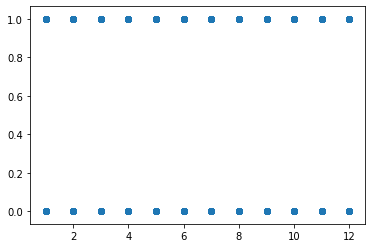

In [27]:
plt.scatter(df['Month'], df['dep_delayed_15min'])

In [28]:
X = df[['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'Distance']]
Y = df['dep_delayed_15min']

In [29]:
X.head()

,Month,DayofMonth,DayOfWeek,DepTime,Distance
0,8,21,7,1934,732
1,4,20,3,1548,834
2,9,2,5,1422,416
3,11,25,6,1015,872
4,10,7,6,1828,423


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [38]:
X_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,Distance
77109,8,24,4,2214,646
33074,2,18,5,1646,1562
55211,6,6,2,1737,861
93687,1,31,2,1928,370
66712,10,17,1,1549,49


In [34]:
len(X_test)

20000

In [39]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [40]:
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
clf.predict(X_test)

array([0.12407196, 0.2470403 , 0.27994079, ..., 0.37790584, 0.36510458,
       0.27797699])

In [44]:
Y_test

79103    0
30331    0
20250    0
92151    0
80635    0
        ..
22238    1
73468    0
19867    0
38658    0
70614    0
Name: dep_delayed_15min, Length: 20000, dtype: int64

In [45]:
clf.score(X_test, Y_test)

0.058247339165083734